## 制作模型预测结果的在市中心的空间分布
图7显示了市中心的建筑实例级模型性能。蓝色表示旧建筑被预测为新建筑，而粉色表示模型将新建筑预测为旧建筑。灰色表示预测正确。
![Fig. 7. Building instance level prediction performance.jpeg](https://image-1315363329.cos.ap-shanghai.myqcloud.com/lessons/202310241606786.jpeg)

In [29]:
## 读取数据
import pandas as pd

df1 = pd.read_csv('predictions_with_building_age_model_6_on_test_data.csv')
df2 = pd.read_csv('predictions_with_building_age_model_6_on_train_data.csv')
df = pd.concat([df1, df2])
df.head()

,id,prediction,true_label
0,363100012103594,7,7
1,363100012110942,4,4
2,363100012174221,8,8
3,363100012198469,6,7
4,363100012232265,6,6


In [30]:
# 保存合并后的原始结果
df.to_csv('predictions_with_building_age_model_6_on_all_data.csv', index=False)

In [31]:
## 按照4.1.3的方法重新排列类别（我们将“pre-1652”的索引从8更改为0，其他类别相应地向后移动），方便计算
 
# 我们需要更新标签以反映这个新顺序
# 这意味着我们需要将所有的8替换为0，然后将其他所有数字加1（因为我们把'–1652'放在了最前面）
df['true_label'] = df['true_label'].apply(lambda x: x + 1 if x < 8 else 0)
df['prediction'] = df['prediction'].apply(lambda x: x + 1 if x < 8 else 0)
df.head()

,id,prediction,true_label
0,363100012103594,8,8
1,363100012110942,5,5
2,363100012174221,0,0
3,363100012198469,7,8
4,363100012232265,7,7


In [32]:
## 新增一列差值
df['diff'] = df['prediction'] - df['true_label']
df.head()

,id,prediction,true_label,diff
0,363100012103594,8,8,0
1,363100012110942,5,5,0
2,363100012174221,0,0,0
3,363100012198469,7,8,-1
4,363100012232265,7,7,0


负数为预测为旧建筑，正数为预测为新建筑，0为预测正确。差值为偏离真实值的程度。

In [33]:
# 把类别名字换回来，方便阅读
updated_class_dict = {
    0: '–1652',  # 这个现在是第一个
    1: '-1706',
    2: '-1765',
    3: '-1846',
    4: '-1911',
    5: '-1944',
    6: '-1978',
    7: '–1995',
    8: '–2023'  # 这个现在是最后一个
}
df['true_label'] = df['true_label'].apply(lambda x: updated_class_dict[x])
df['pre_label'] = df['prediction'].apply(lambda x: updated_class_dict[x])

In [34]:
df.drop(columns=['prediction'], inplace=True)

In [35]:
df.head()

,id,true_label,diff,pre_label
0,363100012103594,–2023,0,–2023
1,363100012110942,-1944,0,-1944
2,363100012174221,–1652,0,–1652
3,363100012198469,–2023,-1,–1995
4,363100012232265,–1995,0,–1995


In [36]:
df.id

0        363100012103594
1        363100012110942
2        363100012174221
3        363100012198469
4        363100012232265
              ...       
63637    363100012118012
63638    363100012196527
63639    363100012226712
63640    363100012246785
63641    363100012074968
Name: id, Length: 79553, dtype: int64

In [37]:
## 处理id列 原地理数据的id时16位 
# 将 id 转换为字符串，确保其长度为 16 个字符，必要时用前导零填充。
df['id'] = df['id'].apply(lambda x: f"{int(x):016}")
df['id'].head()

0    0363100012103594
1    0363100012110942
2    0363100012174221
3    0363100012198469
4    0363100012232265
Name: id, dtype: object

In [38]:
# save
df.to_csv('predictions_with_building_age_diff_citywide.csv', index=False)

In [39]:
# 读取建筑物的信息
import geopandas as gpd
gdb = r"../../5-ArcgisPro工程/建筑风格和年代深度学习.gdb"
lr_name = 'Amsterdam_buildings_Project'
gdf = gpd.read_file(filename=gdb, layer=lr_name)
gdf

,rdf_seealso,identificatie,bouwjaar,status,gebruiksdoel,oppervlakte_min,oppervlakte_max,aantal_verblijfsobjecten,geom_Length,geom_Area,geometry
0,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061709,2007,Pand in gebruik,woonfunctie,331.0,331.0,1,60.067413,173.201627,"MULTIPOLYGON (((635512.808 5802343.021, 635518..."
1,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061225,1923,Pand in gebruik,woonfunctie,84.0,84.0,1,28.671057,48.016138,"MULTIPOLYGON (((628083.847 5808893.547, 628087..."
2,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012061228,2004,Pand in gebruik,woonfunctie,93.0,128.0,2,38.826189,80.168377,"MULTIPOLYGON (((635718.103 5802400.059, 635709..."
3,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012062224,1916,Pand in gebruik,woonfunctie,50.0,80.0,4,36.203712,61.107085,"MULTIPOLYGON (((632084.702 5803319.551, 632084..."
4,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012063200,1965,Pand in gebruik,overige gebruiksfunctie,1.0,1.0,1,18.999679,19.500827,"MULTIPOLYGON (((628012.652 5798762.544, 628013..."
...,...,...,...,...,...,...,...,...,...,...,...
163205,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012108647,1930,Verbouwing pand,woonfunctie,55.0,74.0,4,40.131014,85.559206,"MULTIPOLYGON (((626035.853 5801868.062, 626049..."
163206,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012205962,1930,Verbouwing pand,NaN,NaN,NaN,0,12.798413,10.147451,"MULTIPOLYGON (((626055.874 5801865.515, 626059..."
163207,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012071006,1930,Pand in gebruik,woonfunctie,97.0,108.0,3,43.029830,105.224237,"MULTIPOLYGON (((626261.380 5802821.801, 626261..."
163208,http://bag.basisregistraties.overheid.nl/bag/i...,0363100012086580,1930,Pand in gebruik,woonfunctie,103.0,111.0,3,49.600137,112.567086,"MULTIPOLYGON (((626265.463 5802767.599, 626265..."


In [40]:
# 选取需要的列
gdf = gdf[['identificatie', 'geometry']]
gdf.head()

,identificatie,geometry
0,0363100012061709,"MULTIPOLYGON (((635512.808 5802343.021, 635518..."
1,0363100012061225,"MULTIPOLYGON (((628083.847 5808893.547, 628087..."
2,0363100012061228,"MULTIPOLYGON (((635718.103 5802400.059, 635709..."
3,0363100012062224,"MULTIPOLYGON (((632084.702 5803319.551, 632084..."
4,0363100012063200,"MULTIPOLYGON (((628012.652 5798762.544, 628013..."


In [41]:
## 合并两种数据
df_merge = pd.merge(left=gdf, right=df, left_on='identificatie', right_on='id', how='outer')
df_merge.head()

,identificatie,geometry,id,true_label,diff,pre_label
0,0363100012061709,"MULTIPOLYGON (((635512.808 5802343.021, 635518...",NaN,NaN,NaN,NaN
1,0363100012061225,"MULTIPOLYGON (((628083.847 5808893.547, 628087...",NaN,NaN,NaN,NaN
2,0363100012061228,"MULTIPOLYGON (((635718.103 5802400.059, 635709...",0363100012061228,–2023,0.0,–2023
3,0363100012062224,"MULTIPOLYGON (((632084.702 5803319.551, 632084...",NaN,NaN,NaN,NaN
4,0363100012063200,"MULTIPOLYGON (((628012.652 5798762.544, 628013...",NaN,NaN,NaN,NaN


In [42]:
# 看一下diff非空值所占的比例，即有效数据的比例
df_merge['diff'].notnull().sum() / df_merge.shape[0]

0.4870035261276262

In [43]:
df_merge.describe()

,diff
count,79553.000000
mean,-0.049363
std,0.813230
min,-8.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


### python绘图库可视化结果

<Axes: >

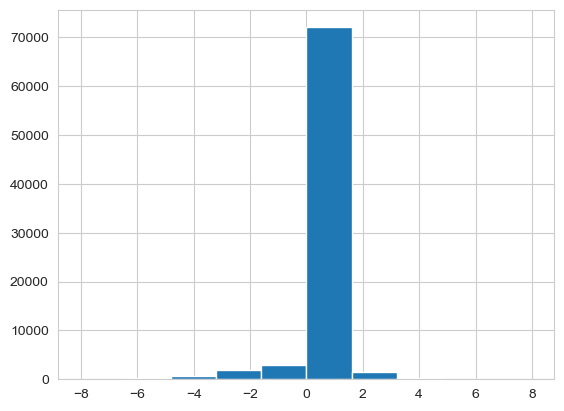

In [44]:
# 用看一下diff的总体分布
df_merge['diff'].hist()

## 空间可视化结果
接下来来绘图，我喜欢在arcgis pro中绘图 所以我们把gdf_merge导出到数据库

In [45]:
df_merge.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
# # save
df_merge.to_file(filename=gdb, layer='predictions_with_building_age_diff_city_wide')

C:\Users\hncdj\AppData\Local\Temp\ipykernel_48392\3867282973.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_merge.to_file(filename=gdb, layer='predictions_with_building_age_diff_city_wide')


粉色代表新建筑被预测为旧建筑，蓝色代表旧建筑被预测为新建筑。
![阿姆斯特丹市中心建筑年代预测结果空间分布](../../5-ArcgisPro工程/阿姆斯特丹市中心建筑年代预测结果空间分布.jpg)